<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW6Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

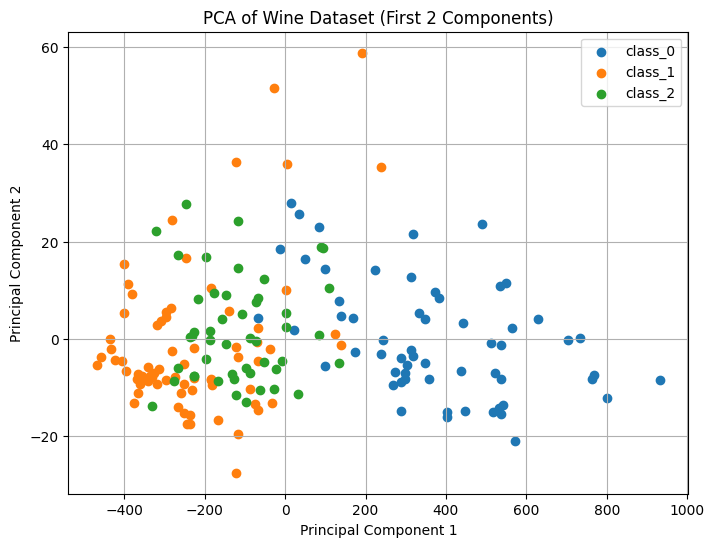

Q1(b) Explained Variance Ratio of PC1 and PC2: [0.99809123 0.00173592]
Q1(d) Evaluation Metrics:
SVM (PCA features) Results:
  Accuracy: 0.7083
  Precision: 0.6941
  Recall: 0.7083

Decision Tree (Original features) Results:
  Accuracy: 0.9306
  Precision: 0.9414
  Recall: 0.9306



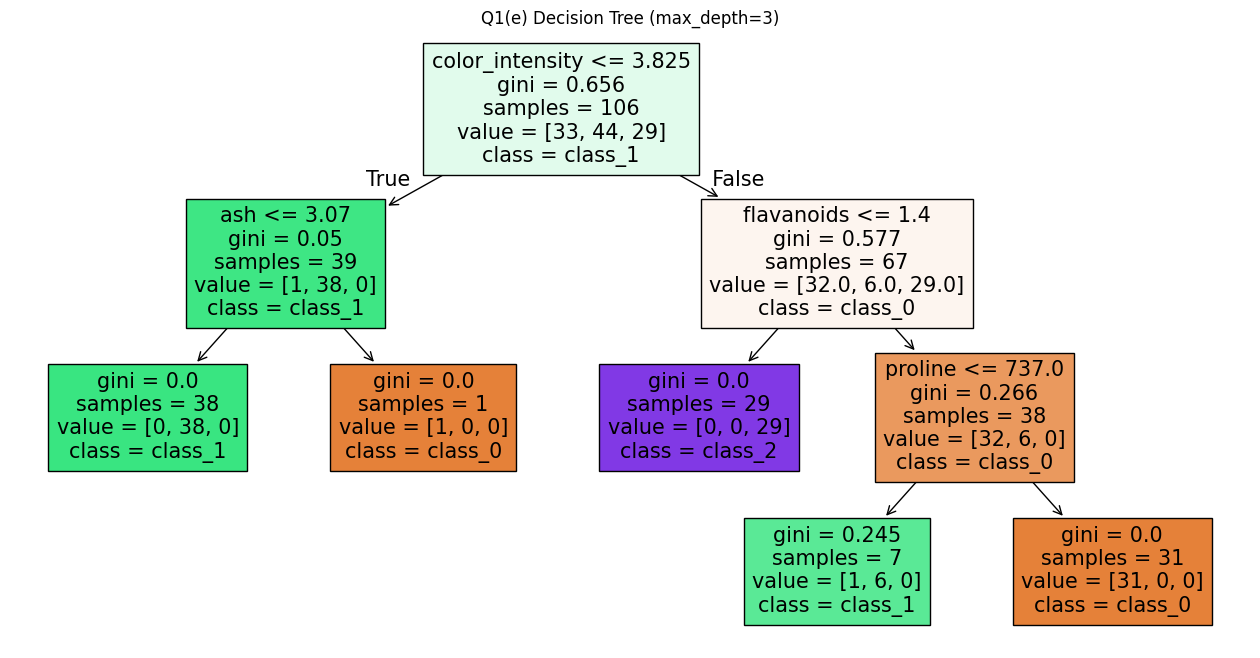

In [4]:
#Homework 6 Question 1

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Load the wine dataset and compute first two principal components
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA result
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(8, 6))
for label in df_pca['target'].unique():
    plt.scatter(df_pca[df_pca['target'] == label]['PC1'],
                df_pca[df_pca['target'] == label]['PC2'],
                label=wine.target_names[label])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (First 2 Components)')
plt.legend()
plt.grid(True)
plt.show()

# Explained variance ratio of the first two PCs
explained_variance_ratio = pca.explained_variance_ratio_
print("Q1(b) Explained Variance Ratio of PC1 and PC2:", explained_variance_ratio[:2])

# Train SVM on first two principal components
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_pca, y_train_pca)
y_pred_svm = svm_clf.predict(X_test_pca)

# Train Decision Tree classifier on original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.4, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_orig, y_train_orig)
y_pred_dt = dt_clf.predict(X_test_orig)

# Define function to evaluate classifiers
def evaluate_classifier(y_true, y_pred, name="Classifier"):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}\n")

# Evaluate both classifiers
print("Q1(d) Evaluation Metrics:")
evaluate_classifier(y_test_pca, y_pred_svm, "SVM (PCA features)")
evaluate_classifier(y_test_orig, y_pred_dt, "Decision Tree (Original features)")

# Plot the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(dt_clf, feature_names=feature_names, class_names=wine.target_names, filled=True)
plt.title("Q1(e) Decision Tree (max_depth=3)")
plt.show()
